<a href="https://colab.research.google.com/github/andychiv/AWS_course/blob/main/Congresstional_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Andy Chiv, Shannon Weng

# Understanding the Relationship between Race and 6+ Figures Salary Households

In [62]:
# first some initial setup of libraries we will be using
import pandas as pd # this is the main library used in python for manipulating data. 
import json # this is a library to parse json (javascript object notation)
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas
import plotly.express as px
import seaborn as sns

#Step 1: Hypothesis

- H0: There is no difference in the percentage of top earners (6+ figures) for all congressional districts.
- HA: There is a difference in the percentage of top earners (6+ figures) for all congressional districts.

# Step 2: Data Extraction & Wrangling

In this step, we begin

- extracting the data for househoulds whose income are more than 100,000 dollars from the cencus website.  We also extract similar data but only for white, asian, hispanic and black people whose income are more than 100,000 dollars. These are the main 4 groups we are interested for further analysis.
- performing data cleaning and transforming variables into their desired data types.

In [63]:
# Input the url that contains US states and district
url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001_001E,B19001_014E,B19001_015E,B19001_016E,B19001_017E&for=congressional%20district:*"

# open the url
response = urlopen(url)

# Parse the json data and load the dataset
data_json = json.loads(response.read())
data_json.pop(0)

# Convert the json data into a dataframe
state_df = pd.DataFrame(data_json)

# Convert all columns into numerical value
cols = [1, 2, 3, 4, 5, 6, 7]
state_df[cols] = state_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Find the total number of households that have 100K+ incomes
state_df["All_100K+"] = state_df.iloc[:, [2, 3, 4, 5]].sum(axis=1)

# Extract State name
state_df[['District', 'State']] = state_df[0].str.split(',', expand=True)

# Rename some columns
state_df.rename(columns={1: 'Total_Households', 
                         6: 'District Number', 
                         7: "State Code"}, inplace=True)

# Let's just keep the columns we need
state_df = state_df[['Total_Households', 'All_100K+', "District Number", 'State Code', 'State']]

state_df.head()

,Total_Households,All_100K+,District Number,State Code,State
0,289474,93753,26,10,Michigan
1,299804,64821,28,4,Mississippi
2,278057,73075,26,14,Michigan
3,306685,69324,26,1,Michigan
4,285554,65682,28,3,Mississippi


## White Households

In [64]:
# Input the url that contains US states and district
url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001A_001E,B19001A_014E,B19001A_015E,B19001A_016E,B19001A_017E&for=congressional%20district:*"

# open the url
response = urlopen(url)

# Parse the json data and load the dataset
data_json = json.loads(response.read())
data_json.pop(0)

# Convert the json data into a dataframe
white_df = pd.DataFrame(data_json)

# Convert all columns into numerical value
cols = [1, 2, 3, 4, 5, 6, 7]
white_df[cols] = white_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Find the total number of households that have 100K+ incomes
white_df["White_100K+"] = white_df.iloc[:, [2, 3, 4, 5]].sum(axis=1)

# Extract State name
white_df[['District', 'State']] = white_df[0].str.split(',', expand=True)

# Rename some columns
white_df.rename(columns={1: 'Total_Households', 
                         6: 'District Number', 
                         7: "State Code"}, inplace=True)

# Let's just keep the columns we need
white_df = white_df[['White_100K+', "District Number", 'State Code', 'State']]

white_df.head()

,White_100K+,District Number,State Code,State
0,84963,26,10,Michigan
1,53135,28,4,Mississippi
2,38375,26,14,Michigan
3,64421,26,1,Michigan
4,51619,28,3,Mississippi


## Asian Households

In [65]:
# Input the url that contains US states and district
url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001D_001E,B19001D_014E,B19001D_015E,B19001D_016E,B19001D_017E&for=congressional%20district:*"

# open the url
response = urlopen(url)

# Parse the json data and load the dataset
data_json = json.loads(response.read())
data_json.pop(0)

# Convert the json data into a dataframe
asian_df = pd.DataFrame(data_json)

# Replacing all NA to 0
asian_df.fillna({1:0}, inplace=True)

# Convert all columns into numerical value
cols = [1, 2, 3, 4, 5, 6, 7]
asian_df[cols] = asian_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Find the total number of households that have 100K+ incomes
asian_df["Asian_100K+"] = asian_df.iloc[:, [2, 3, 4, 5]].sum(axis=1)

# Extract State name
asian_df[['District', 'State']] = asian_df[0].str.split(',', expand=True)

# Rename some columns
asian_df.rename(columns={1: 'Total_Households', 
                         6: 'District Number', 
                         7: "State Code"}, inplace=True)

# Let's just keep the columns we need
asian_df = asian_df[['Asian_100K+', "District Number", 'State Code', 'State']]

# Convert some columns into integer
asian_df = asian_df.astype({"Asian_100K+":"Int32", 
                            "District Number": "Int32", 
                            "State Code": "Int32"})

asian_df.head()

,Asian_100K+,District Number,State Code,State
0,4771,2,0,Alaska
1,2753,4,2,Arizona
2,1310,4,3,Arizona
3,9858,4,5,Arizona
4,9539,4,6,Arizona


# Black Households

In [66]:
# Black
url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001B_001E,B19001B_014E,B19001B_015E,B19001B_016E,B19001B_017E&for=congressional%20district:*"

# open the url
response = urlopen(url)

# Parse the json data and load the dataset
data_json = json.loads(response.read())
data_json.pop(0)

# Convert the json data into a dataframe
black_df = pd.DataFrame(data_json)

# Replacing all NA to 0
black_df.fillna({1:0}, inplace=True)

# Convert all columns into numerical value
cols = [1, 2, 3, 4, 5, 6, 7]
black_df[cols] = black_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Find the total number of households that have 100K+ incomes
black_df["Black_100K+"] = black_df.iloc[:, [2, 3, 4, 5]].sum(axis=1)

# Extract State name
black_df[['District', 'State']] = black_df[0].str.split(',', expand=True)

# Rename some columns
black_df.rename(columns={1: 'Total_Households', 
                         6: 'District Number', 
                         7: "State Code"}, inplace=True)

# Let's just keep the columns we need
black_df = black_df[['Black_100K+', "District Number", 'State Code', 'State']]

# Convert some columns into integer
black_df = black_df.astype({"Black_100K+":"Int32", "District Number": "Int32", "State Code": "Int32"})

black_df.head()

,Black_100K+,District Number,State Code,State
0,6964,1,1,Alabama
1,8794,1,2,Alabama
2,9181,1,3,Alabama
3,1850,1,4,Alabama
4,11738,1,5,Alabama


## Hispanic Households

In [67]:
# Hispanic
url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B19001I_001E,B19001I_014E,B19001I_015E,B19001I_016E,B19001I_017E&for=congressional%20district:*"

# open the url
response = urlopen(url)

# Parse the json data and load the dataset
data_json = json.loads(response.read())
data_json.pop(0)

# Convert the json data into a dataframe
hispanic_df = pd.DataFrame(data_json)

# Replacing all NA to 0
hispanic_df.fillna({1:0}, inplace=True)

# Convert all columns into numerical value
cols = [1, 2, 3, 4, 5, 6, 7]
hispanic_df[cols] = hispanic_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

# Find the total number of households that have 100K+ incomes
hispanic_df["Hispanic_100K+"] = hispanic_df.iloc[:, [2, 3, 4, 5]].sum(axis=1)

# Extract State name
hispanic_df[['District', 'State']] = hispanic_df[0].str.split(',', expand=True)

# Rename some columns
hispanic_df.rename(columns={1: 'Total_Households', 
                            6: 'District Number', 
                            7: "State Code"}, inplace=True)

# Let's just keep the columns we need
hispanic_df = hispanic_df[['Hispanic_100K+', "District Number", 'State Code', 'State']]

# Convert some columns into integer
hispanic_df = hispanic_df.astype({"Hispanic_100K+":"Int32", "District Number": "Int32", "State Code": "Int32"})

hispanic_df.head()

,Hispanic_100K+,District Number,State Code,State
0,2138,26,10,Michigan
1,1495,28,4,Mississippi
2,1995,26,14,Michigan
3,1182,26,1,Michigan
4,0,28,3,Mississippi


# Step 3: Merging Data

We merge the `state_df` datasets with the other 4 race-only datasets using `State`, `State code` and `District Number` to join. Later, we create new columns whose values are the percentage of a respective race whose incomes are more than 100,000 dollars in each congressional district. 

In [68]:
# Join all the dataframe from 4 races: White, Asian, Black and Hispanic 
top_earner_df = state_df.merge(
    white_df, on=["State", "State Code", "District Number"]).merge(
        asian_df, on=["State", "State Code", "District Number"]).merge(
            black_df, on=["State", "State Code", "District Number"]).merge(
                hispanic_df, on=["State", "State Code", "District Number"])

# Rearrange the column    
cols=["State","State Code", "District Number", "Total_Households", "All_100K+", "White_100K+", "Asian_100K+", "Black_100K+", "Hispanic_100K+"]      
acs_df = top_earner_df[cols]
acs_df

,State,State Code,District Number,Total_Households,All_100K+,White_100K+,Asian_100K+,Black_100K+,Hispanic_100K+
0,Michigan,10,26,289474,93753,84963,0,2765,2138
1,Mississippi,4,28,299804,64821,53135,0,6490,1495
2,Michigan,14,26,278057,73075,38375,4278,26334,1995
3,Michigan,1,26,306685,69324,64421,0,0,1182
4,Mississippi,3,28,285554,65682,51619,0,10647,0
...,...,...,...,...,...,...,...,...,...
432,Missouri,6,29,297714,91537,82495,0,1863,3099
433,Missouri,7,29,320905,69532,62806,0,0,2351
434,Michigan,5,26,282817,55794,47747,0,5195,1658
435,Michigan,6,26,287908,79216,69430,0,2810,3021


In [73]:
# Compute some new columns based on the existing columns for later visualization
acs_df["% White_100k+"] = (100*acs_df["White_100K+"])/acs_df["Total_Households"]
acs_df["% Asian_100k+"] = (100*acs_df["Asian_100K+"])/acs_df["Total_Households"]
acs_df["% Black_100k+"] = (100*acs_df["Black_100K+"])/acs_df["Total_Households"]
acs_df["% Hispanic_100k+"] = (100*acs_df["Hispanic_100K+"])/acs_df["Total_Households"]

acs_df

<ipython-input-73-117f81d4a943>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_df["% White_100k+"] = (100*acs_df["White_100K+"])/acs_df["Total_Households"]
<ipython-input-73-117f81d4a943>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acs_df["% Asian_100k+"] = (100*acs_df["Asian_100K+"])/acs_df["Total_Households"]
<ipython-input-73-117f81d4a943>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,State,State Code,District Number,Total_Households,All_100K+,White_100K+,Asian_100K+,Black_100K+,Hispanic_100K+,% White_100k+,% Asian_100k+,% Black_100k+,% Hispanic_100k+
0,Michigan,10,26,289474,93753,84963,0,2765,2138,29.350823,0.0,0.955181,0.738581
1,Mississippi,4,28,299804,64821,53135,0,6490,1495,17.723246,0.0,2.164748,0.498659
2,Michigan,14,26,278057,73075,38375,4278,26334,1995,13.801127,1.538533,9.47072,0.717479
3,Michigan,1,26,306685,69324,64421,0,0,1182,21.005592,0.0,0.0,0.385412
4,Mississippi,3,28,285554,65682,51619,0,10647,0,18.076791,0.0,3.728542,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,Missouri,6,29,297714,91537,82495,0,1863,3099,27.709480,0.0,0.625768,1.040932
433,Missouri,7,29,320905,69532,62806,0,0,2351,19.571524,0.0,0.0,0.732616
434,Michigan,5,26,282817,55794,47747,0,5195,1658,16.882648,0.0,1.836877,0.586245
435,Michigan,6,26,287908,79216,69430,0,2810,3021,24.115342,0.0,0.976006,1.049294


# Step 4: Data Visualization

Reshaping the data so that we can visual the data based on `seaborn` package

In [70]:
# Access the percentage columns only
col_vars=['% White_100k+', '% Asian_100k+', '% Black_100k+', '% Hispanic_100k+']
# Put them into a new dataframe
df = acs_df[col_vars]
# Reshape the dataframe
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=col_vars)
# replace column names
df_melt.columns = ['Index', 'Race', 'Percentage']
df_melt.head()

,Index,Race,Percentage
0,0,% White_100k+,29.350823
1,1,% White_100k+,17.723246
2,2,% White_100k+,13.801127
3,3,% White_100k+,21.005592
4,4,% White_100k+,18.076791


# Density Plot

Below is the density plot of all percentages of household incomes with more than 100,000 dollars for each race.

- Distribution of the percentage of top earners for white people is normally distributed with a mean of 25%. 
- Distributions of the percentage of top earners for Asian, Black and Hispanic are skew-right. There is a high density around 0% for Black people, indicating there are many congressional districts who black people do not make 6 figures.

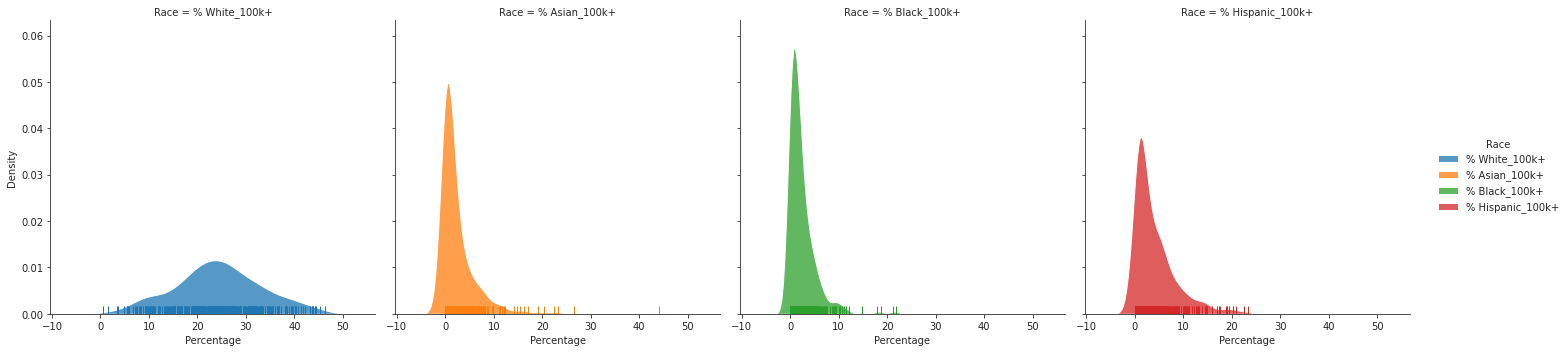

In [71]:
sns.displot(df_melt, x="Percentage", col="Race", kind = "kde", rug = True, palette='tab10', multiple="stack", hue ="Race")

# Violin Plot

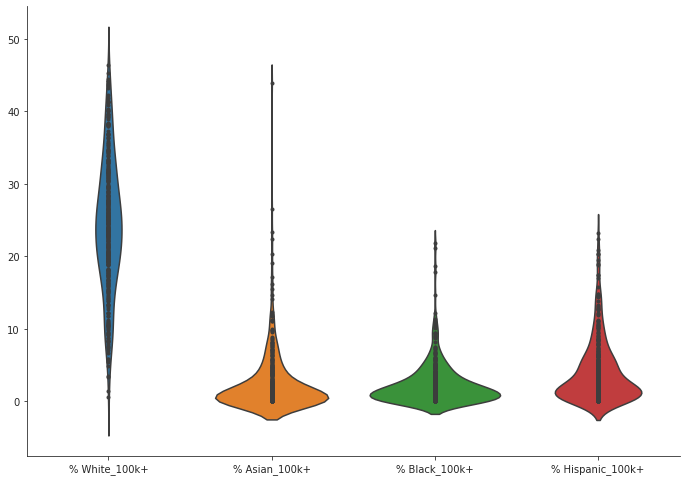

In [72]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=df, inner="points", ax=ax)    
sns.despine()

# Conclusion:

- The density and violin plots confirm our initial hypothesis that there is a difference in the percentages of top-earners (6 figures) due to race in every congressional districts.
- White households account for the majority of top earners in every district with an average of 25 percent. 
- The average percentage of top earners for Asian, Black and Hispanic households for all congressional districts are around 2 percents. 